<a href="https://colab.research.google.com/github/Savvy-Slowley/Ethereum-Over-Time/blob/main/Ethereum_Over_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM

In [37]:
df = pd.read_csv('/content/ETH_USD_2016-12-16_2021-10-31-CoinDesk.csv', index_col='Date')
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2016-12-16,ETH,7.836525,8.195936,8.206139,7.694463
2016-12-17,ETH,7.709642,7.836525,7.892591,7.699776
2016-12-18,ETH,7.813304,7.709642,7.939579,7.495653
2016-12-19,ETH,7.735086,7.813304,7.926575,7.690697
2016-12-20,ETH,7.601047,7.735086,7.809061,7.552730


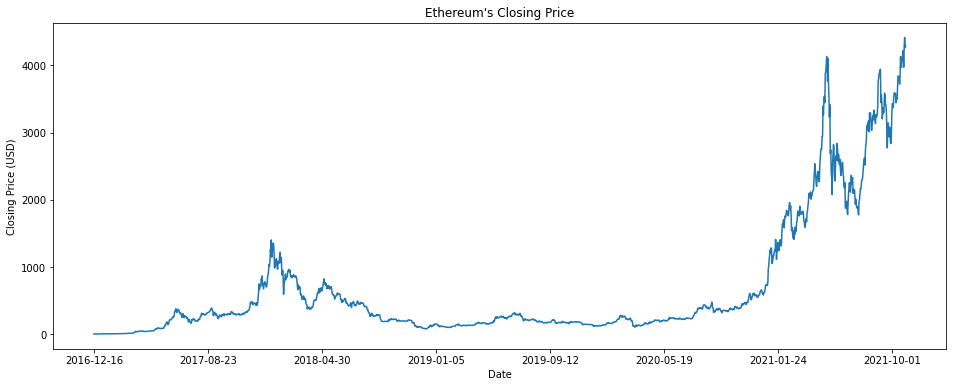

In [36]:
plt.figure(figsize=(16,6))
df['Closing Price (USD)'].plot()
plt.ylabel('Closing Price (USD)');
plt.title("Ethereum's Closing Price" );

In [39]:
train = df.loc['2016-12-16':'2021-09-30', ['Closing Price (USD)']]
test = df.loc['2021-10-01':'2021-11-01', ['Closing Price (USD)']]

In [40]:
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [41]:
# Reshape data into sequences using TimeseriesGenerator
train_features = TimeseriesGenerator(train, train, length = 5)

In [42]:
# Step 1: Define our network structure
# Save the input shape
input_shape = train_features[0][0][0].shape
input_shape

(5, 1)

In [43]:
# Sequential model
model = Sequential()

In [44]:
# LSTM layer
model.add(LSTM(units = 50, 
               return_sequences = True, # True if next layer will be a recurrent layer
               input_shape = input_shape))
model.add(LSTM(units = 50, 
               return_sequences = True))
model.add(LSTM(units = 50, 
               return_sequences = False))
# Output layer
model.add(Dense(units = 1, activation = 'linear'))

In [51]:
# Step 2: Compile
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['mse'])

In [52]:
# Step 3: Fit our model
history = model.fit(train_features, 
                    epochs=100)

Epoch 1/100
14/14 [==============================] - 5s 17ms/step - loss: 8.6361e-04 - mse: 8.6361e-04
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0011 - mse: 0.0011
Epoch 3/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0012 - mse: 0.0012
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 8.6184e-04 - mse: 8.6184e-04
Epoch 5/100
14/14 [==============================] - 0s 18ms/step - loss: 6.4670e-04 - mse: 6.4670e-04
Epoch 6/100
14/14 [==============================] - 0s 18ms/step - loss: 6.1238e-04 - mse: 6.1238e-04
Epoch 7/100
14/14 [==============================] - 0s 17ms/step - loss: 6.8087e-04 - mse: 6.8087e-04
Epoch 8/100
14/14 [==============================] - 0s 18ms/step - loss: 7.0953e-04 - mse: 7.0953e-04
Epoch 9/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0012 - mse: 0.0012
Epoch 10/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0013 - mse: 0.0013
E

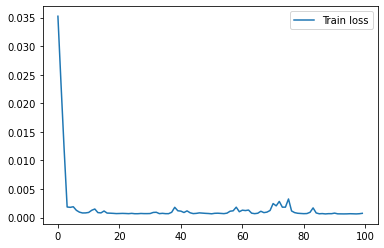

In [47]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.legend();

In [48]:
test_features = TimeseriesGenerator(test, test, length = 5)

In [49]:
preds = model.predict(test_features)

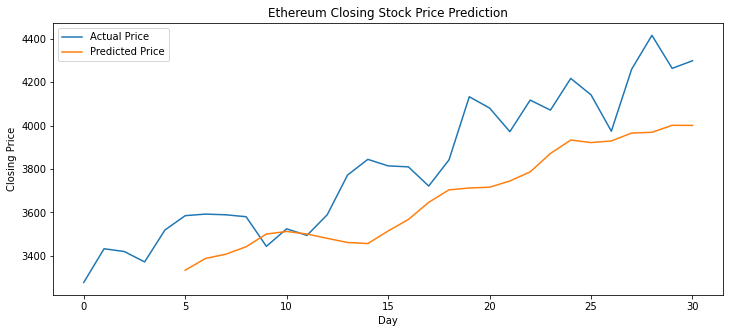

In [50]:
plt.figure(figsize = (12, 5))
plt.plot(scaler.inverse_transform(test), label='Actual Price')
# Note: there are less prices for the predicted price than the actual price, 
# because we need to use 5 days of prices to create our first prediction
plt.plot(range(5, len(test)), scaler.inverse_transform(preds), label='Predicted Price')
plt.title('Ethereum Closing Price Prediction')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend();